In [3]:
import numpy as np

# Generating some random data with outliers
np.random.seed(0)
data = np.random.normal(loc=0, scale=1, size=1000)
outliers = np.random.normal(loc=10, scale=5, size=50)
data_with_outliers = np.concatenate((data, outliers))

# Shuffle the data
np.random.shuffle(data_with_outliers)

# Print the first few elements of the data
print("Data with outliers:")
print(data_with_outliers[:20])


Data with outliers:
[-1.34149673 -0.42431762 -0.07785476  0.40746184  0.61037938  2.06449286
  0.03280875  0.23958276 -0.32566947 -0.65855297 -1.98079647  0.68981816
 -0.03928282 -1.270485   17.81702373 -1.5069984  -0.26393735  0.28044171
 -0.15501009  0.12898291]


array([[-1.34149673, -0.42431762, -0.07785476, ..., 11.07482795,
         0.84436298,  0.86351966]])

In [23]:
from sklearn.covariance import EllipticEnvelope
El=EllipticEnvelope(contamination=0.1)
El.fit(data_with_outliers.reshape(-1,1))
El.predict(data_with_outliers.reshape(-1,1))# sthe negative one shows that there exist an outlier(s)

array([ 1,  1,  1, ..., -1,  1,  1])

In [5]:
import numpy as np

def remove_outliers_zscore(data, threshold=3):
    z_scores = np.abs((data - data.mean()) / data.std())
    return data[z_scores < threshold]

remove_outliers_zscore(data_with_outliers)

array([-1.34149673, -0.42431762, -0.07785476, ..., -0.6522936 ,
        0.84436298,  0.86351966])

METHOD TWO

In [6]:
def remove_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data >= lower_bound) & (data <= upper_bound)]

remove_outliers_iqr(data_with_outliers)

array([-1.34149673, -0.42431762, -0.07785476, ..., -0.6522936 ,
        0.84436298,  0.86351966])

METHOD THREE

In [7]:
def remove_outliers_modified_zscore(data, threshold=3.5):
    median = np.median(data)
    median_absolute_deviation = np.median(np.abs(data - median))
    modified_z_scores = 0.6745 * (data - median) / median_absolute_deviation
    return data[modified_z_scores < threshold]
remove_outliers_modified_zscore(data_with_outliers)

array([-1.34149673, -0.42431762, -0.07785476, ..., -0.6522936 ,
        0.84436298,  0.86351966])

METHOD FOUR

<Axes: >

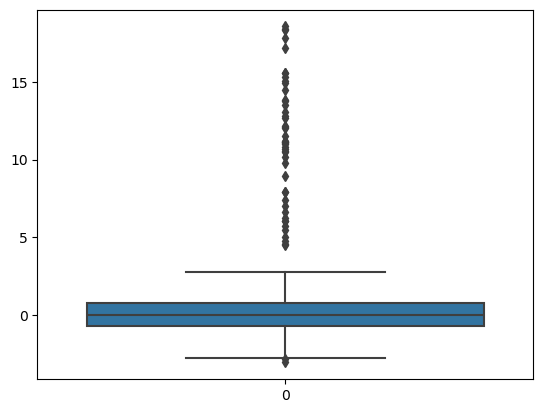

In [8]:
import seaborn as sns
sns.boxplot(data_with_outliers)